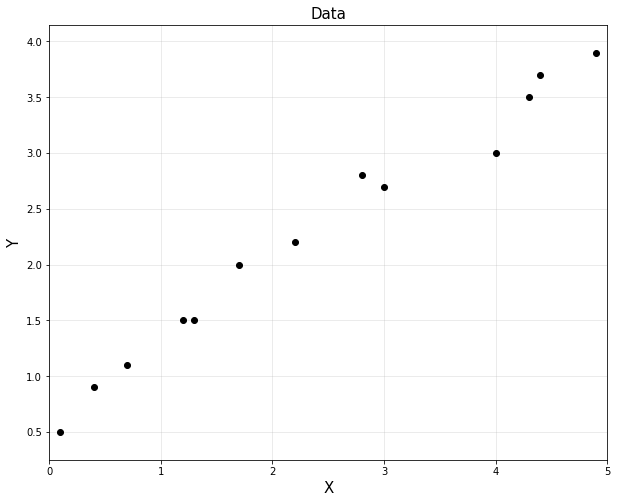

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# data points in column vector [input, output]
x = np.array([0.1, 0.4, 0.7, 1.2, 1.3, 1.7, 2.2, 2.8, 3.0, 4.0, 4.3, 4.4, 4.9]).reshape(-1, 1)
y = np.array([0.5, 0.9, 1.1, 1.5, 1.5, 2.0, 2.2, 2.8, 2.7, 3.0, 3.5, 3.7, 3.9]).reshape(-1, 1)

plt.figure(figsize = (10,8))
plt.plot(x, y, 'ko')
plt.title('Data', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.xlim([0, 5])
plt.show()

theta:
 [[0.65306531]
 [0.67129519]]


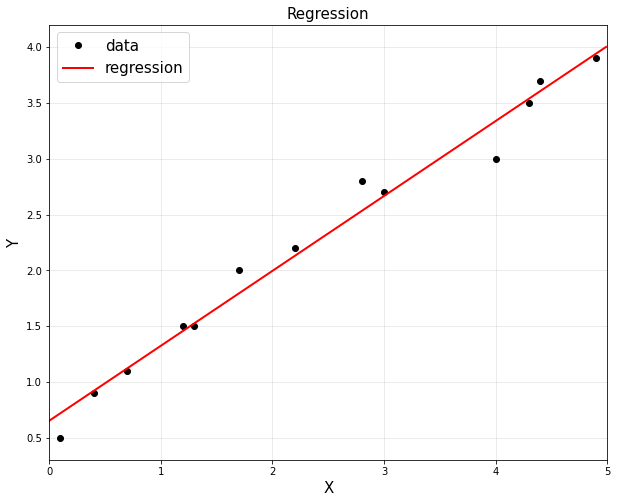

In [16]:
m = y.shape[0]
#A = np.hstack([np.ones([m, 1]), x])
A = np.hstack([x**0, x])
A = np.asmatrix(A)

theta = (A.T*A).I*A.T*y

print('theta:\n', theta)
# to plot
plt.figure(figsize = (10, 8))
plt.title('Regression', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.plot(x, y, 'ko', label = "data")

# to plot a straight line (fitted line)
xp = np.arange(0, 5, 0.01).reshape(-1, 1)
yp = theta[0,0] + theta[1,0]*xp

plt.plot(xp, yp, 'r', linewidth = 2, label = "regression")
plt.legend(fontsize = 15)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.xlim([0, 5])
plt.show()

In [20]:
import cvxpy as cvx

theta2 = cvx.Variable([2, 1])
obj = cvx.Minimize(cvx.norm(A*theta2-y, 2))
prob = cvx.Problem(obj,[])
result = prob.solve()

print('theta:\n',theta2.value)


theta:
 [[0.65306531]
 [0.67129519]]


c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)


In [22]:
import cvxpy as cvx

theta1 = cvx.Variable([2, 1])
obj = cvx.Minimize(cvx.norm(A*theta1-y, 2))
prob = cvx.Problem(obj,[])
result = prob.solve()

print('theta:\n',theta1.value)

theta:
 [[0.65306531]
 [0.67129519]]


c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)


In [23]:
# add outliers
x = np.vstack([x, np.array([0.5, 3.8]).reshape(-1, 1)])
y = np.vstack([y, np.array([3.9, 0.3]).reshape(-1, 1)])

A = np.hstack([x**0, x])
A = np.asmatrix(A)

c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\numpy\matrixlib\defmatrix.py:69: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


In [24]:
A.shape

(15, 2)

c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)


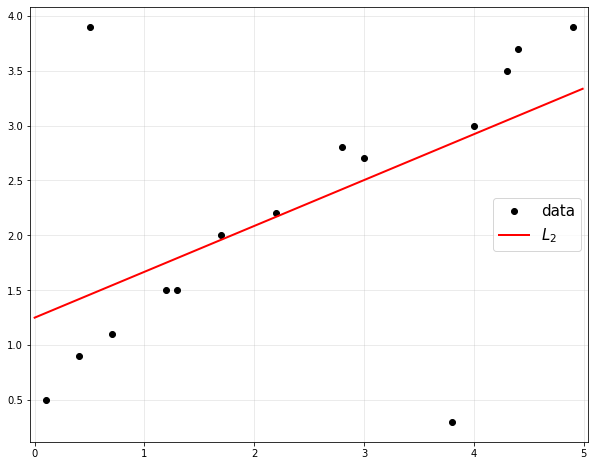

In [25]:
theta2 = cvx.Variable([2, 1])
obj2 = cvx.Minimize(cvx.norm(A*theta2-y, 2))
prob2 = cvx.Problem(obj2).solve()
# to plot straight lines (fitted lines)
plt.figure(figsize = (10, 8))
plt.plot(x, y, 'ko', label = 'data')
xp = np.arange(0, 5, 0.01).reshape(-1,1)
yp2 = theta2.value[0,0] + theta2.value[1,0]*xp

plt.plot(xp, yp2, 'r', linewidth = 2, label = '$L_2$')
plt.axis('equal')
plt.xlim([0, 5])
plt.legend(fontsize = 15, loc = 5)
plt.grid(alpha = 0.3)
plt.show()

c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)


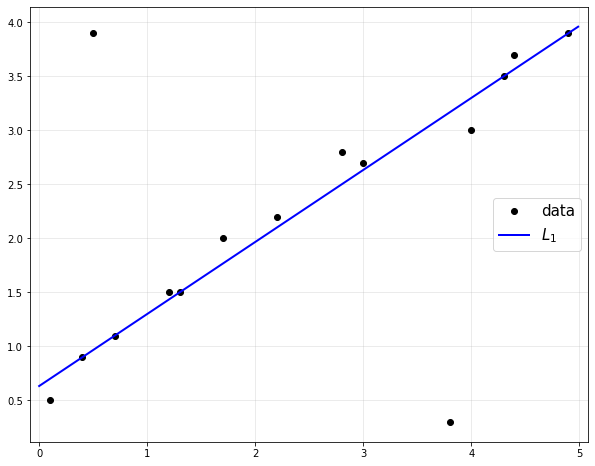

In [26]:
theta1 = cvx.Variable([2, 1])
obj1 = cvx.Minimize(cvx.norm(A*theta1-y, 1))
prob1 = cvx.Problem(obj1).solve()
# to plot straight lines (fitted lines)
plt.figure(figsize = (10, 8))
plt.plot(x, y, 'ko', label = 'data')
xp = np.arange(0, 5, 0.01).reshape(-1,1)
yp1 = theta1.value[0,0] + theta1.value[1,0]*xp

plt.plot(xp, yp1, 'b', linewidth = 2, label = '$L_1$')
plt.axis('equal')
plt.xlim([0, 5])
plt.legend(fontsize = 15, loc = 5)
plt.grid(alpha = 0.3)
plt.show()

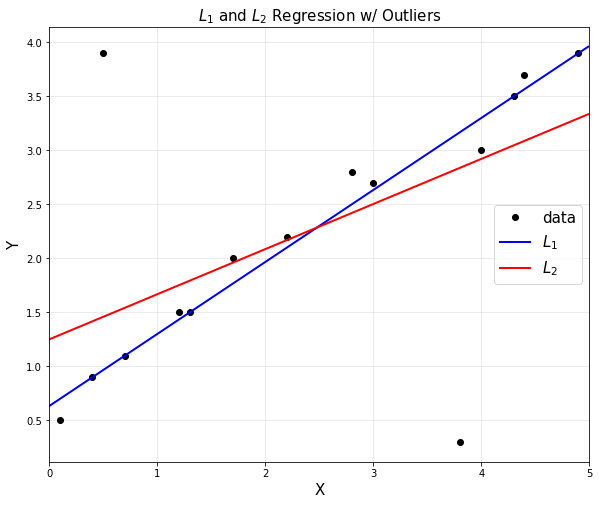

In [27]:
# to plot data
plt.figure(figsize = (10, 8))
plt.plot(x, y, 'ko', label = 'data')
plt.title('$L_1$ and $L_2$ Regression w/ Outliers', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)

# to plot straight lines (fitted lines)
xp = np.arange(0, 5, 0.01).reshape(-1,1)
yp1 = theta1.value[0,0] + theta1.value[1,0]*xp
yp2 = theta2.value[0,0] + theta2.value[1,0]*xp

plt.plot(xp, yp1, 'b', linewidth = 2, label = '$L_1$')
plt.plot(xp, yp2, 'r', linewidth = 2, label = '$L_2$')
plt.axis('scaled')
plt.xlim([0, 5])
plt.legend(fontsize = 15, loc = 5)
plt.grid(alpha = 0.3)
plt.show()


In [32]:
x = np.array([0.1, 0.4, 0.7, 1.2, 1.3, 1.7, 2.2, 2.8, 3.0, 4.0, 4.3, 4.4, 4.9]).reshape(-1, 1)
y = np.array([0.5, 0.9, 1.1, 1.5, 1.5, 2.0, 2.2, 2.8, 2.7, 3.0, 3.5, 3.7, 3.9]).reshape(-1, 1)



In [34]:
from sklearn import linear_model

In [35]:
reg = linear_model.LinearRegression()
reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [36]:
reg.coef_

array([[0.67129519]])

In [37]:
reg.intercept_

array([0.65306531])

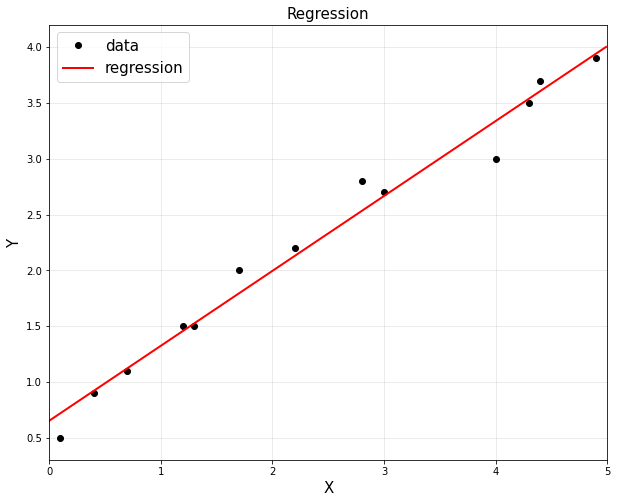

In [38]:
# to plot
plt.figure(figsize = (10, 8))
plt.title('Regression', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.plot(x, y, 'ko', label = "data")

# to plot a straight line (fitted line)
plt.plot(xp, reg.predict(xp), 'r', linewidth = 2, label = "regression")
plt.legend(fontsize = 15)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.xlim([0, 5])
plt.show()
